***IMPORTING THE MODULES***

In [1]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

import os
print(os.getcwd())

C:\Users\user


***DATA IMPORT***

In [2]:
url = 'https://raw.githubusercontent.com/vkoul/data/main/misc/ride_data.csv'

df = pd.read_csv(url)

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,1,Airport,285.0,Trip Completed,11/07/2016 00:20,11/07/2016 00:51
1,2,Airport,NaN,No Cars Available,11/07/2016 00:23,NaN
2,3,Airport,80.0,Trip Completed,11/07/2016 00:24,11/07/2016 01:31
3,4,City,NaN,No Cars Available,11/07/2016 00:37,NaN
4,5,Airport,264.0,Trip Completed,11/07/2016 00:36,11/07/2016 01:35


***Data Quality Check***

In [4]:
df.shape

(6745, 6)

In [5]:
df.info()
#The columns 'Request Timestamp' amd 'Drop timestamp' have been read as objects; we will use the 'date parser' to fix this error while reading int h

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [6]:
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])

In [7]:
df.info()
# we see that that error has been fixed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [8]:
df.duplicated().sum()
#checking for duplicated entries

0

In [9]:
df.isnull().sum()
#checking for null values

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [12]:
df.isnull().mean()*100
#Getting the percentage of the missing values
#Domain knowledge is required to know why 'driver id' and 'drop timestamp' has so many null values

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [13]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT
2,3,Airport,80.0,Trip Completed,2016-11-07 00:24:00,2016-11-07 01:31:00
3,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT
4,5,Airport,264.0,Trip Completed,2016-11-07 00:36:00,2016-11-07 01:35:00
...,...,...,...,...,...,...
6740,6762,Airport,267.0,Trip Completed,2016-07-15 00:07:00,2016-07-15 00:52:00
6741,6763,City,224.0,Trip Completed,2016-07-15 00:04:00,2016-07-15 01:06:00
6742,6764,City,243.0,Trip Completed,2016-07-15 00:06:00,2016-07-15 01:17:00
6743,6765,Airport,NaN,No Cars Available,2016-07-15 00:09:00,NaT


***Data Cleaning***

In [14]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [16]:
df.columns = df.columns.str.lower()
#renaming the columns
df.columns

Index(['request id', 'pickup point', 'driver id', 'status',
       'request timestamp', 'drop timestamp'],
      dtype='object')

In [17]:
df.columns = ['request_id', 'pickup_point', 'driver_id', 'status', 'request_timestamp', 'drop_timestamp']

In [19]:
df.head()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp
0,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT
2,3,Airport,80.0,Trip Completed,2016-11-07 00:24:00,2016-11-07 01:31:00
3,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT
4,5,Airport,264.0,Trip Completed,2016-11-07 00:36:00,2016-11-07 01:35:00


***Extracting relevant columns from the timestamp columns***

**Request Timestamp**

In [55]:
#we will need these columns to extract relevant insights
df['request_year'] = df['request_timestamp'].dt.year
df['request_month'] = df['request_timestamp'].dt.month_name()
df['request_dayname'] = df['request_timestamp'].dt.day_name()
df['request_hour'] = df['request_timestamp'].dt.hour

In [56]:
df.head()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_year,request_month,request_dayname,request_hour,drop_year,drop_dayname,time_stamp
0,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00,2016,November,Monday,0,2016.0,Monday,-1 days +23:29:00
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT,2016,November,Monday,0,NaN,NaN,NaT
2,3,Airport,80.0,Trip Completed,2016-11-07 00:24:00,2016-11-07 01:31:00,2016,November,Monday,0,2016.0,Monday,-1 days +22:53:00
3,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT,2016,November,Monday,0,NaN,NaN,NaT
4,5,Airport,264.0,Trip Completed,2016-11-07 00:36:00,2016-11-07 01:35:00,2016,November,Monday,0,2016.0,Monday,-1 days +23:01:00


**Drop Timestamp**

In [22]:
df['drop_year'] = df['drop_timestamp'].dt.year
df['drop_dayname'] = df['drop_timestamp'].dt.day_name()

In [23]:
df['time_stamp'] = (df['request_timestamp'] - df['drop_timestamp'])

In [57]:
df.tail()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_year,request_month,request_dayname,request_hour,drop_year,drop_dayname,time_stamp
6740,6762,Airport,267.0,Trip Completed,2016-07-15 00:07:00,2016-07-15 00:52:00,2016,July,Friday,0,2016.0,Friday,-1 days +23:15:00
6741,6763,City,224.0,Trip Completed,2016-07-15 00:04:00,2016-07-15 01:06:00,2016,July,Friday,0,2016.0,Friday,-1 days +22:58:00
6742,6764,City,243.0,Trip Completed,2016-07-15 00:06:00,2016-07-15 01:17:00,2016,July,Friday,0,2016.0,Friday,-1 days +22:49:00
6743,6765,Airport,NaN,No Cars Available,2016-07-15 00:09:00,NaT,2016,July,Friday,0,NaN,NaN,NaT
6744,6766,City,108.0,Trip Completed,2016-07-15 00:06:00,2016-07-15 01:10:00,2016,July,Friday,0,2016.0,Friday,-1 days +22:56:00


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   request_id         6745 non-null   int64          
 1   pickup_point       6745 non-null   object         
 2   driver_id          4095 non-null   float64        
 3   status             6745 non-null   object         
 4   request_timestamp  6745 non-null   datetime64[ns] 
 5   drop_timestamp     2831 non-null   datetime64[ns] 
 6   request_year       6745 non-null   int64          
 7   request_month      6745 non-null   object         
 8   request_dayname    6745 non-null   object         
 9   request_hour       6745 non-null   int64          
 10  drop_year          2831 non-null   float64        
 11  drop_dayname       2831 non-null   object         
 12  time_stamp         2831 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), float64(2), int64(3), obje

**EDA**

In [59]:
df.describe()

,request_id,driver_id,request_year,request_hour,drop_year,time_stamp
count,6745.000000,4095.000000,6745.0,6745.000000,2831.0,2831
mean,3384.644922,149.501343,2016.0,12.956709,2016.0,0 days 10:45:58.240904274
std,1955.099667,86.051994,0.0,6.504052,0.0,10 days 07:07:53.473784496
min,1.000000,1.000000,2016.0,0.000000,2016.0,-30 days +22:45:00
25%,1691.000000,75.000000,2016.0,7.000000,2016.0,-1 days +22:56:00
50%,3387.000000,149.000000,2016.0,13.000000,2016.0,-1 days +23:08:00
75%,5080.000000,224.000000,2016.0,19.000000,2016.0,-1 days +23:19:00
max,6766.000000,300.000000,2016.0,23.000000,2016.0,147 days 23:27:00


In [60]:
df.describe(include = 'O')
#getting a descriptive summary for the categorical data

,pickup_point,status,request_month,request_dayname,drop_dayname
count,6745,6745,6745,6745,2831
unique,2,3,3,4,5
top,City,Trip Completed,July,Wednesday,Wednesday
freq,3507,2831,4071,2644,1137


In [61]:
df['request_dayname'].unique()
#Tells us which days of the week the drivers work

array(['Monday', 'Wednesday', 'Thursday', 'Friday'], dtype=object)

In [62]:
df['request_year'].nunique()

1

In [63]:
df['request_year'].unique()

array([2016], dtype=int64)

In [64]:
#Is there a relationship between pick-up points and the trip status?
pd.crosstab(df['pickup_point'], df['status']).transpose()

pickup_point,Airport,City
status,,
Cancelled,198,1066
No Cars Available,1713,937
Trip Completed,1327,1504


In [65]:
df['status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: status, dtype: int64

In [66]:
df['status'].value_counts(normalize = True)

Trip Completed       0.419718
No Cars Available    0.392884
Cancelled            0.187398
Name: status, dtype: float64

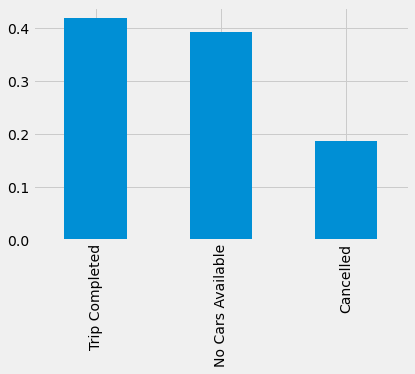

In [67]:
df['status'].value_counts(normalize = True).plot(kind = 'bar');

***Determining The Busy Hours and their relationship with the trip status***

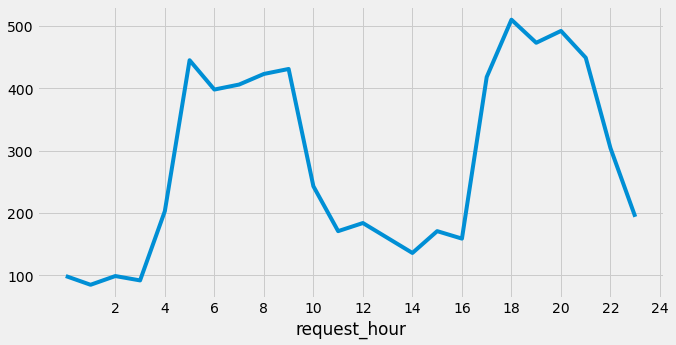

In [68]:
plt.figure(figsize = (10, 5))
plt.xticks([2,4,6,8,10,12,14,16,18,20,22,24])
df.groupby('request_hour')['request_id'].count().plot(kind = 'line');
#This shows us that the peak hours are from 5 to 9 in the morning, and then 5 to 9 at night.


In [69]:
pd.crosstab(df['request_hour'], df['status'])
#Here, we need adequate domain knowledge to figure out why there are usually no cars available at peak hours

status,Cancelled,No Cars Available,Trip Completed
request_hour,,,
0,3,56,40
1,4,56,25
2,5,57,37
3,2,56,34
4,51,74,78
5,176,84,185
6,145,86,167
7,169,63,174
8,178,90,155


***AIRPORT HOURLY PICK-UP***

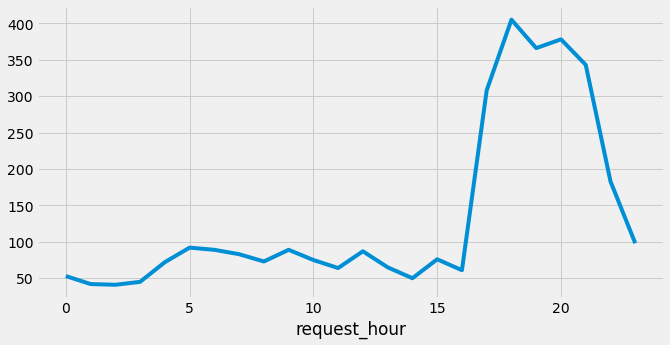

In [70]:
#visualizing each pick-up region differently 
plt.figure(figsize = (10,5))
df.query('pickup_point == "Airport"').groupby('request_hour')['request_id'].count().plot(kind = 'line');

***CITY HOURLY PICK-UP***

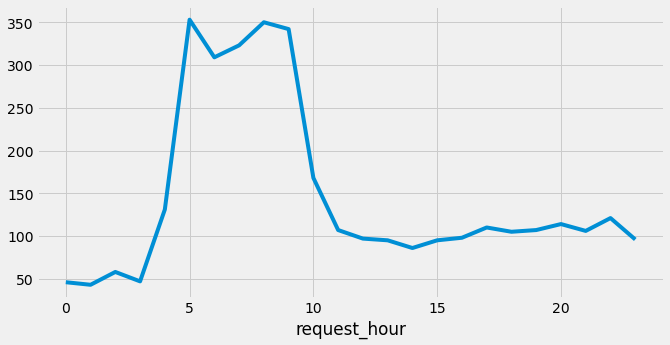

In [71]:
plt.figure(figsize = (10,5))
df.query('pickup_point == "City"').groupby('request_hour')['request_id'].count().plot(kind = 'line');

In [72]:
df['pickup_point'].value_counts(normalize = 'True').round (3)
#We can see here that 52% of the pick-ups happen in the City, while the airport has 48%

City       0.52
Airport    0.48
Name: pickup_point, dtype: float64

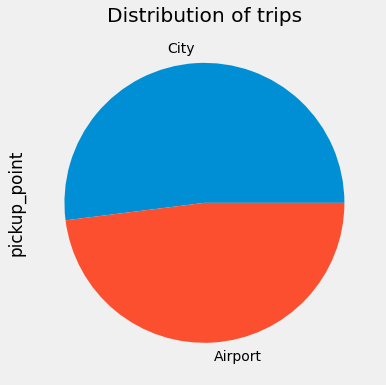

In [73]:
plt.figure(figsize=(8,6))
plt.title('Distribution of trips')
df['pickup_point'].value_counts(normalize = 'True').plot(kind = 'pie');

***Which days are the busiest?***

In [74]:
df['request_dayname'].describe()

count          6745
unique            4
top       Wednesday
freq           2644
Name: request_dayname, dtype: object

In [75]:
df['request_dayname'].value_counts()

Wednesday    2644
Friday       1381
Monday       1367
Thursday     1353
Name: request_dayname, dtype: int64

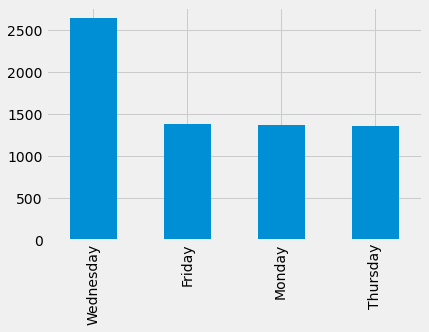

In [76]:
df['request_dayname'].value_counts().plot(kind = 'bar');

In [77]:
df['request_month'].value_counts()
#It is worth investigating why the dataset only has entries for 3 months 

July        4071
November    1367
December    1307
Name: request_month, dtype: int64

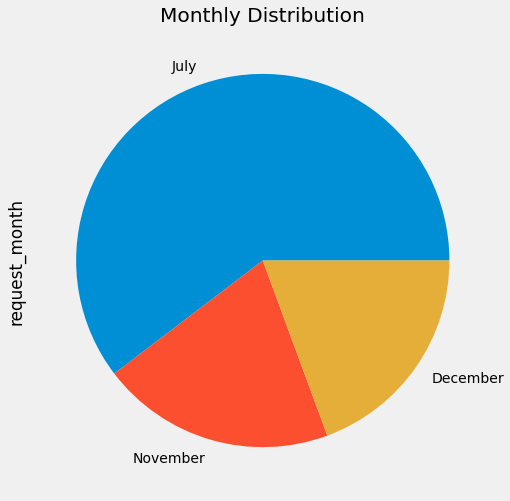

In [80]:
df['request_month'].value_counts().plot(kind = 'pie', figsize=(10,8))
plt.title('Monthly Distribution');

***Driver analysis***

Do some drivers cancel more?

In [81]:
df['driver_id']

0       285.0
1         NaN
2        80.0
3         NaN
4       264.0
        ...  
6740    267.0
6741    224.0
6742    243.0
6743      NaN
6744    108.0
Name: driver_id, Length: 6745, dtype: float64

In [82]:
df['driver_id'].isnull().sum()
#Given the fact that ID is a unique entry,we need to check back with the company to discuss where there are so many null entries

2650

In [83]:
pd.crosstab(df['driver_id'], df['status'])

status,Cancelled,Trip Completed
driver_id,,
1.0,4,9
2.0,4,9
3.0,4,10
4.0,5,10
5.0,2,11
...,...,...
296.0,4,10
297.0,4,11
298.0,4,11


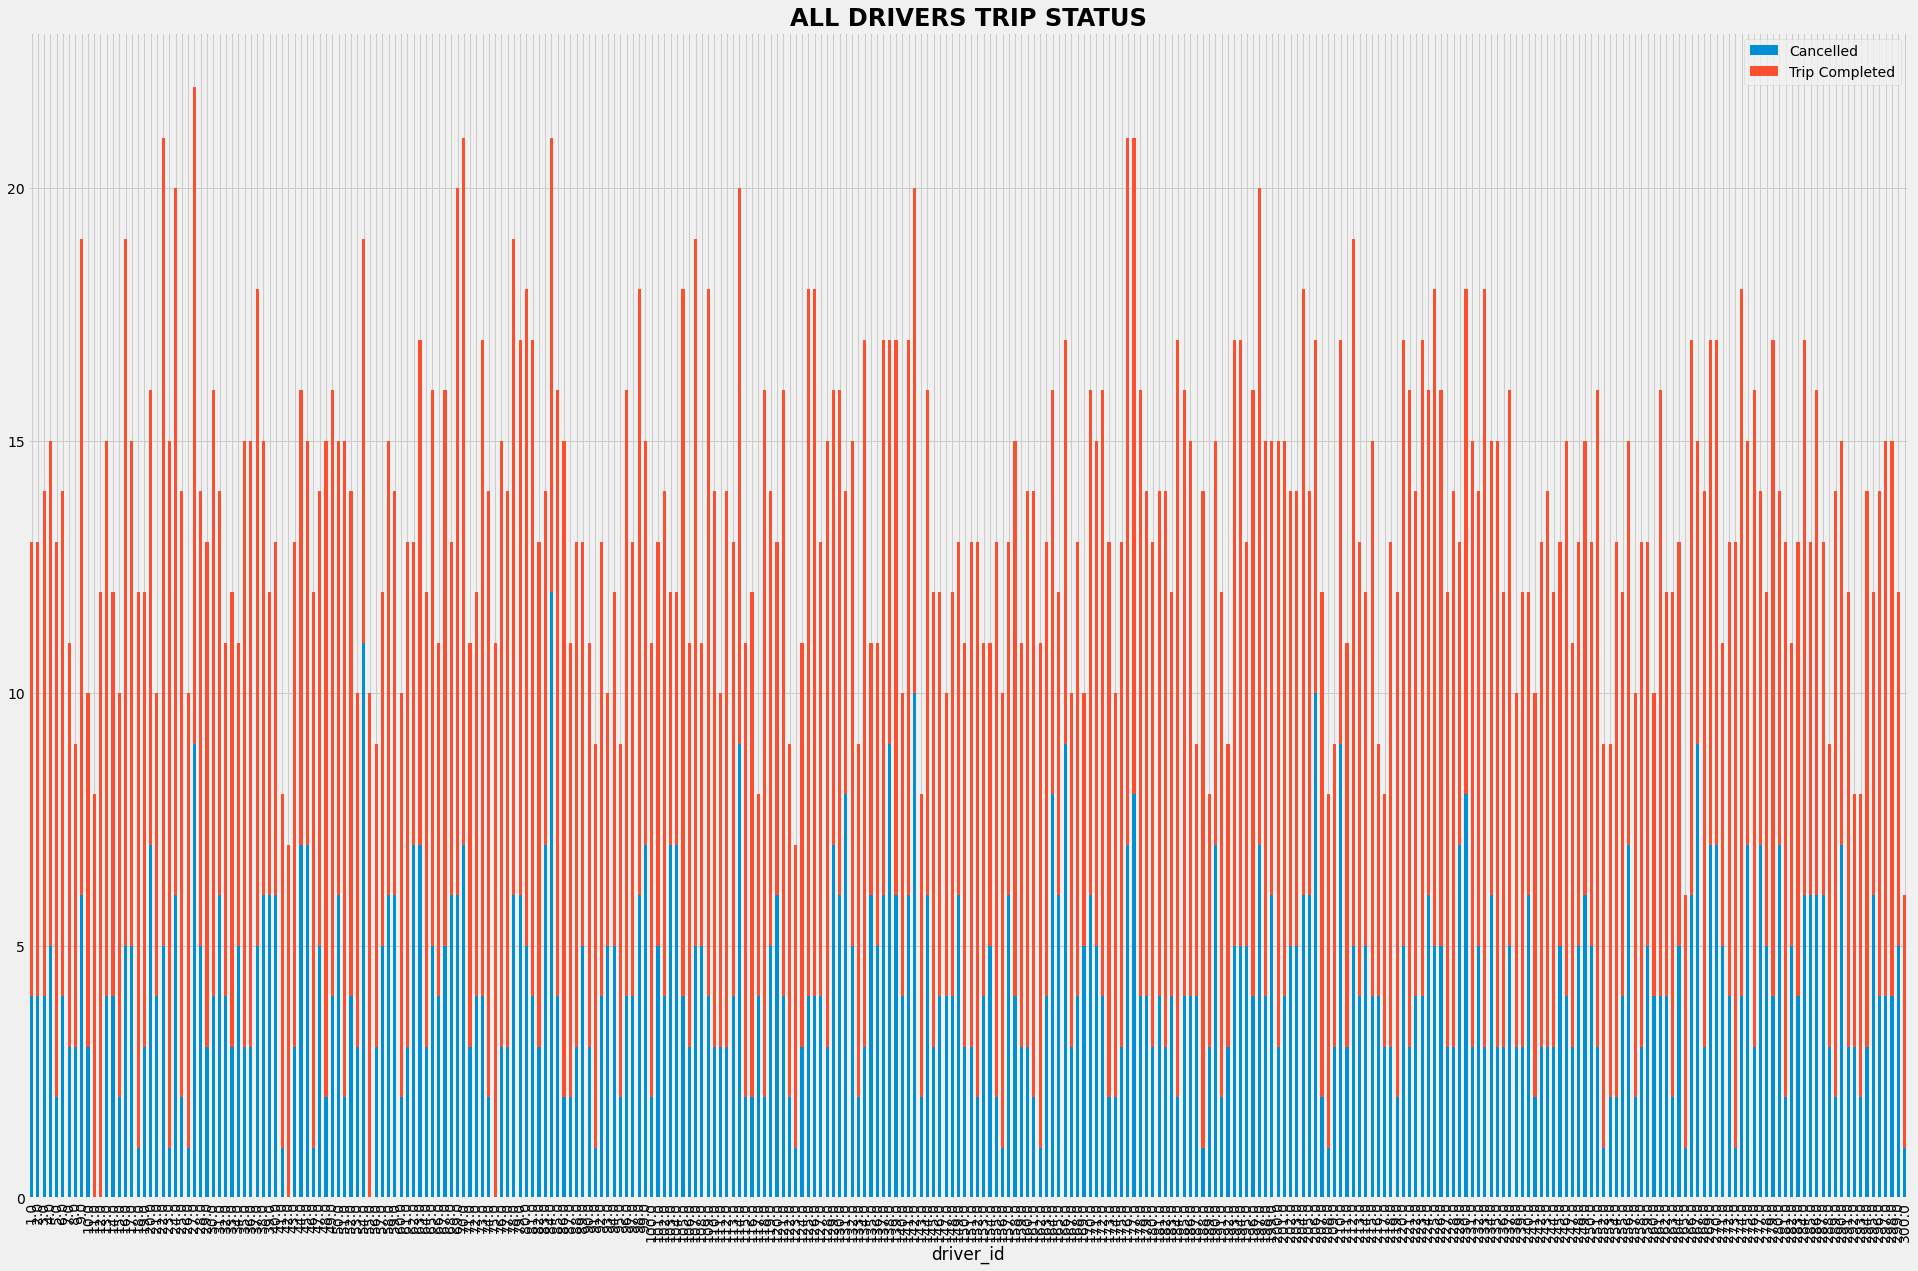

In [91]:
grouped_data = pd.crosstab(df['driver_id'], df['status'])
#plt.figure(figsize = (30,20))
grouped_data.plot(kind = 'bar', stacked = True, figsize=(30,20))
plt.title('ALL DRIVERS TRIP STATUS', fontsize=24, fontweight='bold')
plt.legend();
#Given that the data has 6000 rows and cannot be visulaised in a single grapgh, its best to cut it.

In [92]:
#getting a closer look
df1 = df[df['driver_id'] < 51.0]

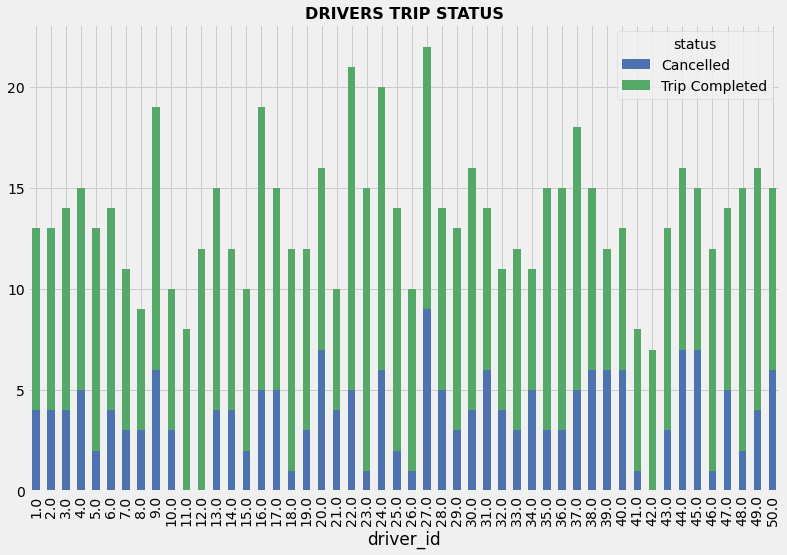

In [93]:
pd.crosstab(df1['driver_id'], df1['status']).plot(kind = 'bar', stacked = True, figsize=(12,8),color=['#4C72B0', '#55A868', '#C44E52', '#8172B2'])
plt.title('DRIVERS TRIP STATUS', fontsize=16, fontweight='bold');
#This shows us which drivers have the most cancelled trip. With adequate domain knowledge, we can further investigate as to why these drivers have canceled trips
#we see that drivers like 11.0 and 12.0 have never had a trip cancelled. This would deserve commendation.

***Number of trips per driver***

In [94]:
df['driver_id'].nunique()
#shows how many unique driver ID there is

300

In [95]:
df['driver_id'].value_counts().head()
#displays number of trips per driver randomly

27.0     22
177.0    21
176.0    21
84.0     21
22.0     21
Name: driver_id, dtype: int64

In [96]:
df.groupby('driver_id').size()
#shows the number of trips per driver in descending order

driver_id
1.0      13
2.0      13
3.0      14
4.0      15
5.0      13
         ..
296.0    14
297.0    15
298.0    15
299.0    12
300.0     6
Length: 300, dtype: int64

In [102]:
all_trips_per_driver = df.groupby('driver_id').size()

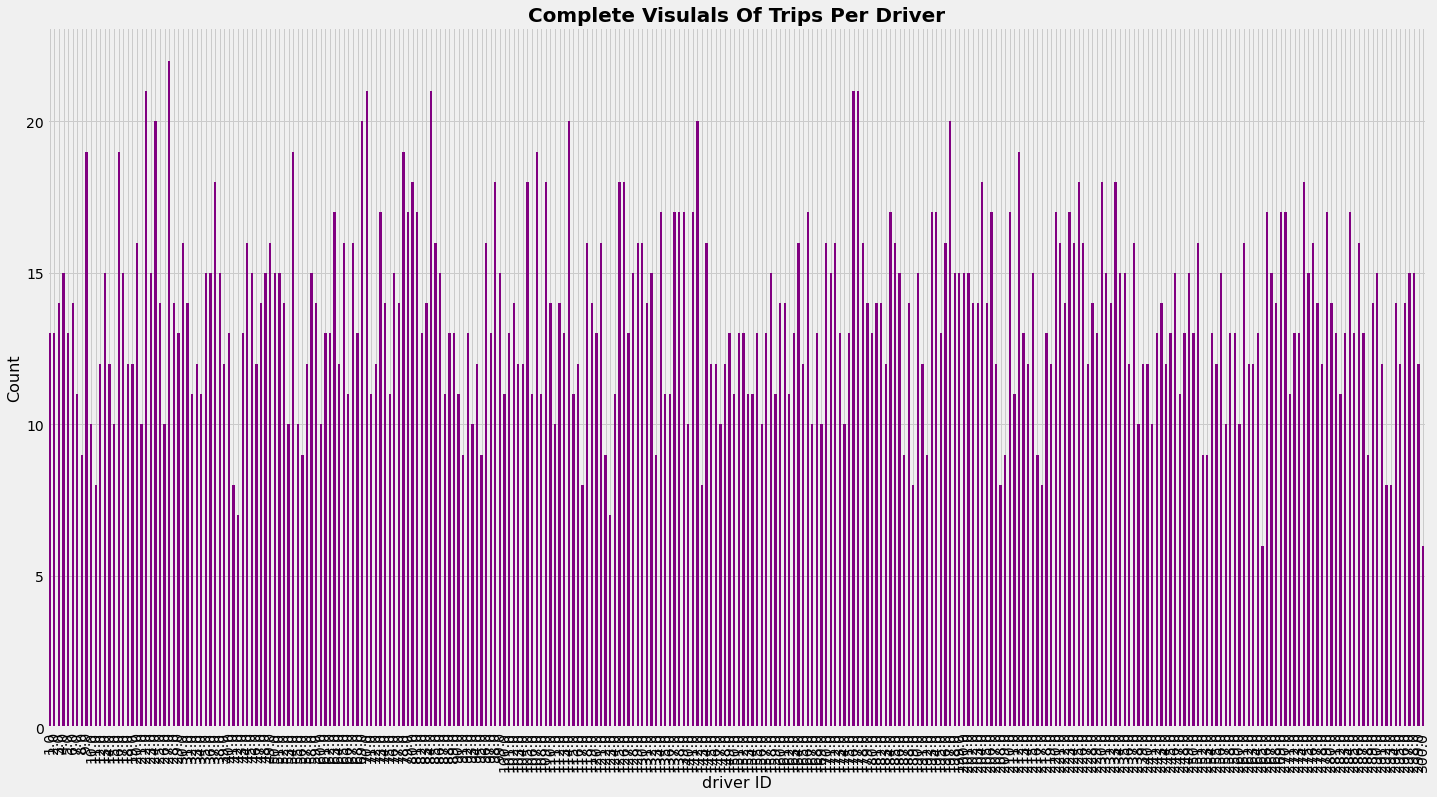

In [106]:
all_trips_per_driver.plot(kind = 'bar', figsize=(22,12), color = 'purple')
plt.title('Complete Visulals Of Trips Per Driver', fontweight = 'bold', fontsize = 20)
plt.xlabel('driver ID', fontsize = 16)
plt.ylabel('Count', fontsize = 16);

In [107]:
#using the same split as above becasue of the size of the data for a closer visualization
trips_per_driver = df1.groupby('driver_id').size()
trips_per_driver.head()

driver_id
1.0    13
2.0    13
3.0    14
4.0    15
5.0    13
dtype: int64

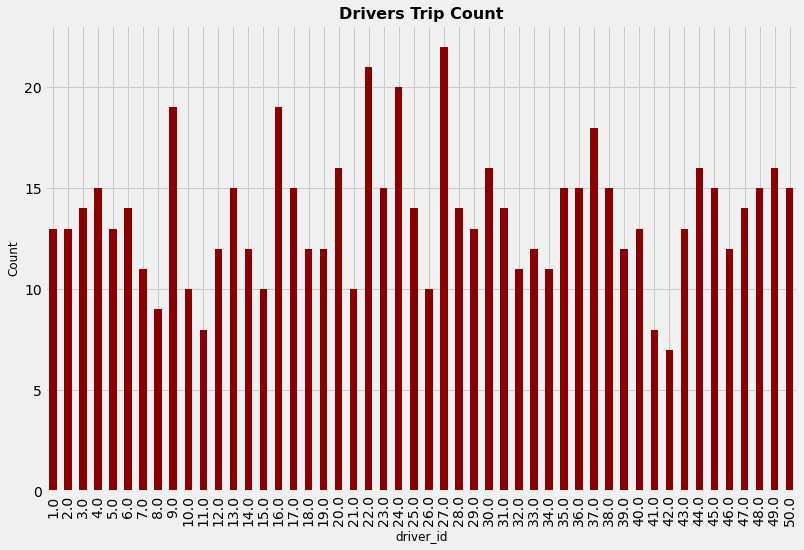

In [108]:
trips_per_driver.plot(kind = 'bar', figsize=(12,8), color='darkred')
plt.title('Drivers Trip Count',fontweight = 'bold', fontsize = 16)
plt.xlabel('driver_id', fontsize=12)
plt.ylabel('Count', fontsize=12);

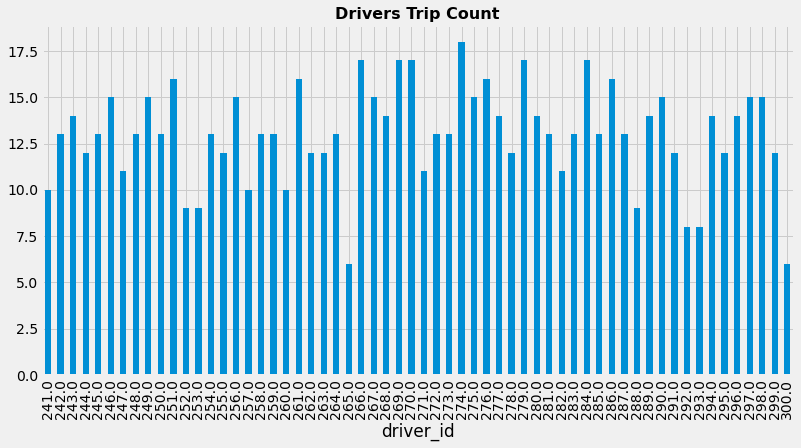

In [109]:
#checking other drivers 
df2 = df[df['driver_id'] > 240.0]
trips_per_driver_2 = df2.groupby('driver_id').size()
trips_per_driver_2.plot(kind='bar', figsize=(12,6))
plt.title('Drivers Trip Count',fontweight = 'bold', fontsize = 16);

## <font color= darkred> Time Spend By Drivers On Each Trip </font> 

In [110]:
df['time_stamp'].describe()

count                          2831
mean      0 days 10:45:58.240904274
std      10 days 07:07:53.473784496
min              -30 days +22:45:00
25%               -1 days +22:56:00
50%               -1 days +23:08:00
75%               -1 days +23:19:00
max               147 days 23:27:00
Name: time_stamp, dtype: object

In [120]:
#converting the time columns and filling the null entries with 0 and NAT

df['drop_timestamp'] = df['drop_timestamp'].fillna(pd.NaT)
df['request_timestamp'] = df['request_timestamp'].fillna(0)


In [166]:
#Using the apply() method with a lambda function to calculate the duration of time for each driver, by subtracting the earliest time stamp from the latest time stamp. 
total_driver_time = df.groupby('driver_id')['time_stamp'].apply(lambda x: x.max() - x.min())
total_driver_time

driver_id
1.0       0 days 00:38:00
2.0       0 days 00:47:00
3.0       0 days 00:38:00
4.0       0 days 00:32:00
5.0       0 days 00:38:00
               ...       
296.0   176 days 23:41:00
297.0     0 days 00:34:00
298.0     0 days 00:31:00
299.0     0 days 00:31:00
300.0     0 days 00:36:00
Name: time_stamp, Length: 300, dtype: timedelta64[ns]

In [159]:
#using the reset_index() to convert the resulting Pandas Series to a DataFrame with columns for the driver IDs and the calculated duration of time for each driver.
driver_duration = df.groupby('driver_id')['time_stamp'].apply(lambda x: (x.max() - x.min()).total_seconds() / 3600.0)
driver_duration = driver_duration.reset_index(name='duration')

In [160]:
driver_duration

,driver_id,duration
0,1.0,0.633333
1,2.0,0.783333
2,3.0,0.633333
3,4.0,0.533333
4,5.0,0.633333
...,...,...
295,296.0,4247.683333
296,297.0,0.566667
297,298.0,0.516667
298,299.0,0.516667


In [161]:
driver_duration.describe()

,driver_id,duration
count,300.000000,300.000000
mean,150.500000,198.618333
std,86.746758,745.935035
min,1.000000,0.166667
25%,75.750000,0.583333
50%,150.500000,0.666667
75%,225.250000,0.783333
max,300.000000,4247.683333


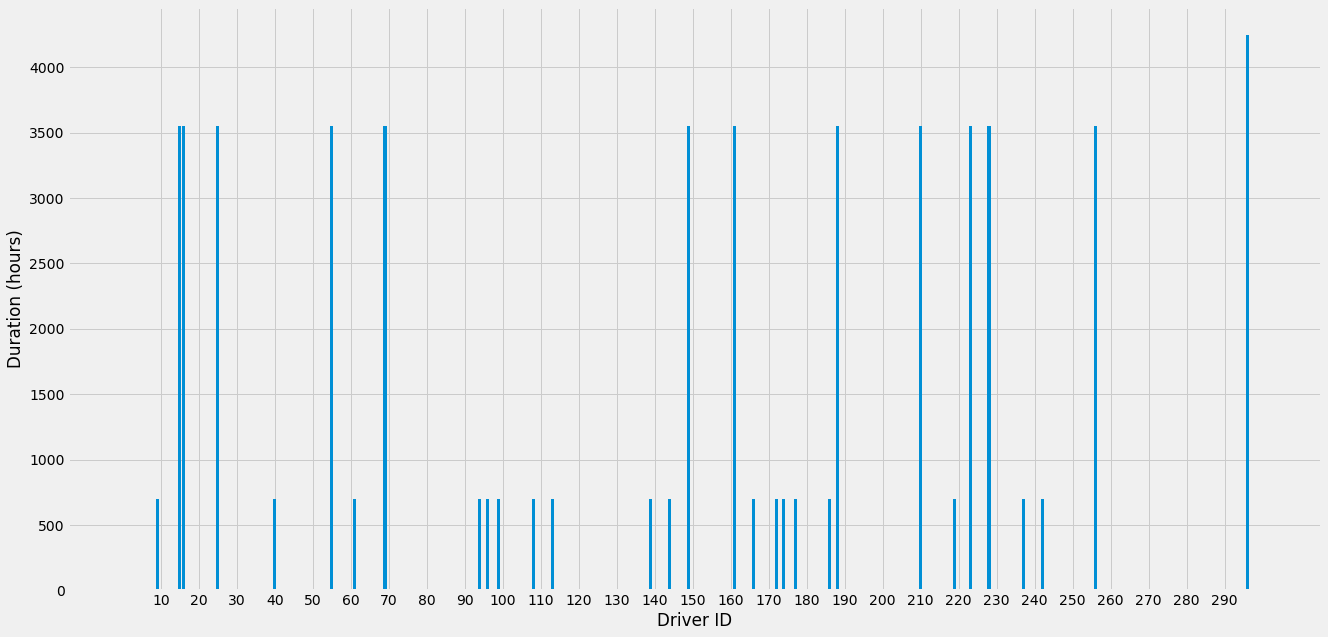

In [171]:
# plot a bar chart of the duration of time for each driver
plt.figure(figsize=(20,10))
plt.bar(driver_duration['driver_id'], driver_duration['duration'])
plt.xlabel('Driver ID')
plt.ylabel('Duration (hours)')
plt.xticks(range(10,300,10))
plt.show()

 **At the end of this analysis, i was able to identify the root causes of the problem;Some of which includes:**

**-None availability of cars, cancellation of trips. The analysis shows that 39% of the time that a ride is ordered, there is no car available. The firm should look into this and if possible, make more cars available.**

**-A lot of drivers are making cancellation. with adequate domain knowledge and/or interviews, one should be able to determine the reason for the cacellations.**

**-The data shows that the average time spent on each trip is 10 hours, which indicates that the trips are relatively long ones. Introducing shorter trips might solve the problem of high rate of cancellations and cars availability.**